<a href="https://colab.research.google.com/github/AguaClara/SWOT/blob/master/Unit_Process_Designs/PrefabSedExoskeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install aguaclara

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 215kB 26.1MB/s 
     |████████████████████████████████| 2.1MB 38.4MB/s 
     |████████████████████████████████| 112kB 45.8MB/s 
     |████████████████████████████████| 552kB 39.7MB/s 
  Created wheel for aguaclara: filename=aguaclara-0.2.10-cp37-none-any.whl size=107246 sha256=286ceefa84cb28c01f3daf349d8279530ec60977077edf19c6e11e05728df283
  Stored in directory: /root/.cache/pip/wheels/ca/49/8d/cd190eac424c74d5d164af69b86bc6ab405affbaa22e22e57b
Successfully built aguaclara


In [3]:
import aguaclara as ac
from aguaclara.core.units import unit_registry as u
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Design of support for PVC tank
[PVC properties](https://www.ipolymer.com/pdf/PVC.pdf)
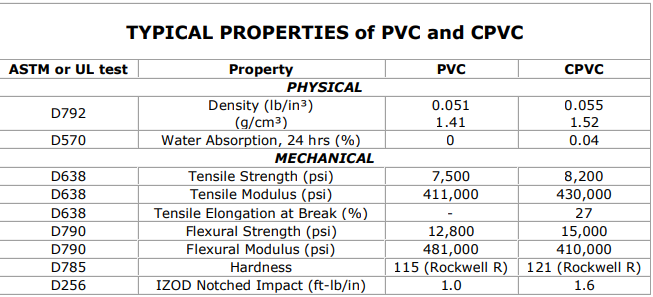
PVC Rigid PVC: 34 - 62 MPa (4930 - 9000 PSI) **

Equation for deflection of simple beam with uniform loading with sliding support. This will be a conservative analysis because the ends of the PVC sheet continue across the next support and thus there is an additional constraint at the support points. The PVC is not able to rotate at the support points. 
[equation source](https://ocw.nthu.edu.tw/ocw/upload/8/258/Chapter_9-98.pdf)

$$\delta = \frac{5qL^4}{384EI}$$

E is the modulus of elasticity, Young's modulus or the tensile modulus and is the material's stiffness

For a rectangle
$$I_x = \frac{b h^3}{12}$$
where b is the width of the rectangle and h is the height. h is thus the thickness of the PVC.

Pressure is force per area or force per length per width
$$ P = \frac{F}{A} = \frac{q}{b}$$

Now combine the previous 3 equations to get deflection, $\delta$ as a function of the pressure

$$\delta = \frac{5PbL^4}{384E}\frac{12}{b h^3}$$

As expected b cancels out

$$\delta = \frac{5P L^4}{32E h^3}$$

Pressure is a function of depth
$$ P = \rho g h_w$$

Substituting into the deflection equation we obtain

$$\delta = \frac{5 \rho g h_w L^4}{32E h^3}$$

Solve for the allowed span between supports, L. And let's call this W.

$$W = \left(\frac{32E h^3\delta}{5 \rho g h_w }\right)^{1/4} $$

In [16]:
PVCE = 400000 * u.psi
h = 1/4 * u.inch
rho = ac.density_water(20 * u.degC)
hw = 2 * u.m
deflection = 1 * u.mm
spanPVCW = ((32 * PVCE * h**3 * deflection)/(5 * rho * u.gravity * hw))**(1/4)
print(spanPVCW.to(u.m))

0.1233 meter


Next steps would be to design the steel or aluminum beam that would be pressing directly against the PVC. This beam would also have a uniform load and we would want to calculate the size and optimal span. 
https://en.wikipedia.org/wiki/List_of_second_moments_of_area

$$I_x = \frac{bh^3-b_1h_1^3}{12}$$
https://www.engineeringtoolbox.com/young-modulus-d_417.html
$$E_{Al} = 69 GPa$$

let t = thickness of the wall of the rectangular tube

$$h_1 = h - 2t$$
$$b_1 = b - 2t$$

$$I_x = \frac{bh^3-(b - 2t)(h - 2t)^3}{12}$$

$$\delta = \frac{5qL^4}{384EI}$$

E is the modulus of elasticity, Young's modulus or the tensile modulus and is the material's stiffness.

Pressure is force per area or force per length per width, the space between horizontal tubes

$$ P = \frac{F}{A} = \frac{q}{W}$$

Now combine the previous 3 equations to get deflection, $\delta$ as a function of the pressure

$$\delta = \frac{5PWL^4}{384E}\frac{12}{bh^3-(b - 2t)(h - 2t)^3}$$

Pressure is a function of depth
$$ P = \rho g h_w$$

Substituting into the deflection equation we obtain

$$\delta = \frac{5\rho g h_wWL^4}{32E}\frac{1}{bh^3-(b - 2t)(h - 2t)^3}$$

Solve for the allowed span between supports, L.

$$L = \left(32E\delta \frac{bh^3-(b - 2t)(h - 2t)^3}{5\rho g h_wW} \right)^{1/4} $$

In [22]:
AlE=69 *u.GPa
print(AlE)
deflection = 1 * u.mm
b=1*u.inch
h=1*u.inch
t=1/8*u.inch
hw = 2*u.m
spantube = (32 * AlE * deflection * (b*h**3 - ((b-2*t)*(h-2*t)**3))/(5 * rho * u.gravity * hw * spanPVCW))**(1/4)
print(spantube.to(u.m))

69 gigapascal
0.4777 meter
